In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

from config import password

from sqlalchemy import create_engine

engine = create_engine("postgresql://postgres:" + password + "@localhost:5432/Homework09")
connection = engine.connect()

In [2]:
bonus_data = pd.read_sql("select titles.title, salaries.salary from titles join salaries on titles.emp_no = salaries.emp_no;", 
                         connection)
bonus_data.head()

,title,salary
0,Senior Engineer,60117
1,Senior Staff,78228
2,Staff,78228
3,Engineer,72488
4,Staff,42365


In [3]:
bonus_data_title = bonus_data.groupby("title").mean().reset_index()
bonus_data_title

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


Text(0, 0.5, 'Salary')

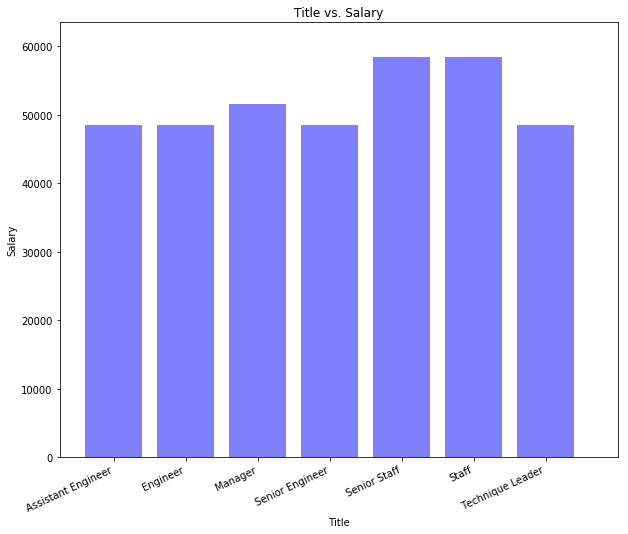

In [4]:
# Set x- and y-axis and tick locations
x_axis = np.arange(0,len(bonus_data_title),1)
y_axis = bonus_data_title["salary"]
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels
plt.figure(figsize=(10,8))
ha = "right"
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, bonus_data_title["title"], rotation=25, ha=ha)

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(bonus_data_title["salary"]) + 5000)

# Set a title and labels
plt.title("Title vs. Salary")
plt.xlabel("Title")
plt.ylabel("Salary")

In [ ]:
# Technical Report
# "$ pip install psycopg2" in anaconda prompt to make operational with postgresql
# postgresql authentication with "config.py" noting the SQLAlchemy documentation link
# note that Senior Staff and Staff are the most highly compensated group
# note the small pay difference between Senior Staff and Staff